In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# drop blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [8]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
# changing Amount colmns from float to int
df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int32')

# Exploratory Data Analysis

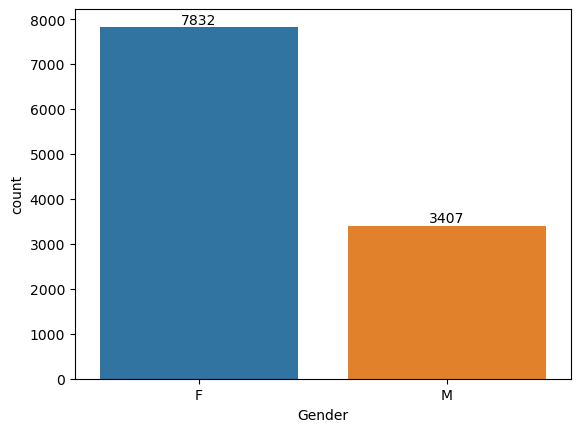

In [11]:
# plotting a bar chart for gender and it's count
gen = sns.countplot(x='Gender', data = df)
for bars in gen.containers:
  gen.bar_label(bars)

In [12]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

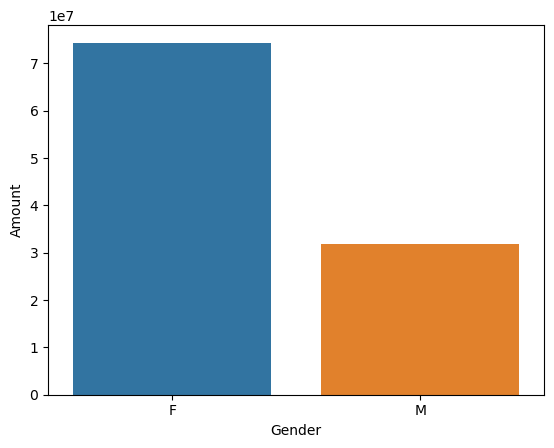

In [13]:
#Bar chart for gender vs total amount
sales_gender = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Gender', y='Amount', data = sales_gender)

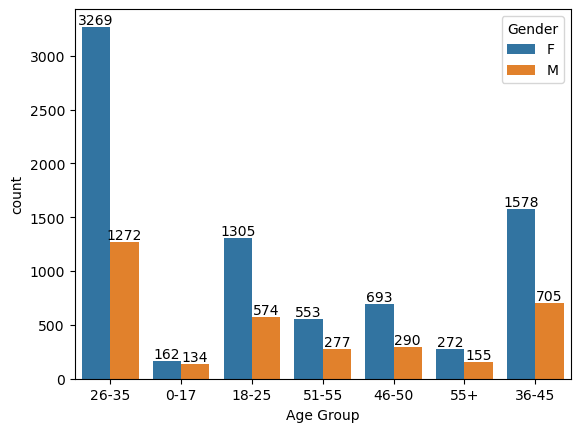

In [14]:
# EDA on Age group
age = sns.countplot(data=df, x = 'Age Group', hue = 'Gender')

for bars in age.containers:
  age.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

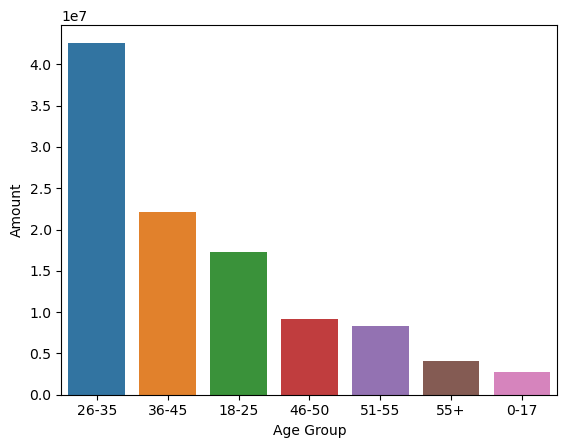

In [15]:
# total amount vs age group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Age Group', y= 'Amount', data = sales_age)

<Axes: xlabel='State', ylabel='Orders'>

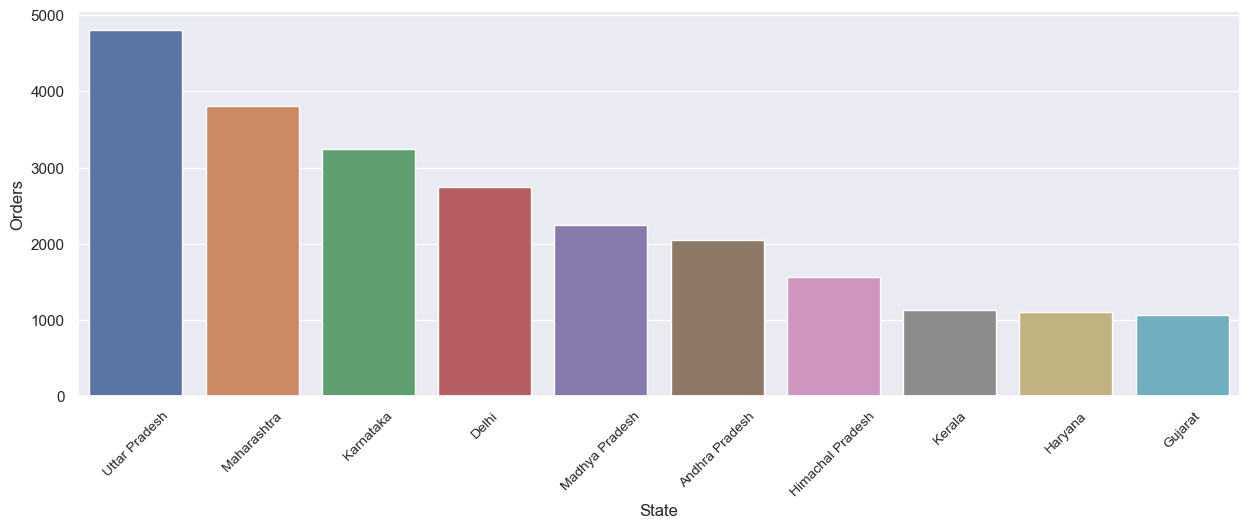

In [16]:
# EDA based on States
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by = 'Orders', ascending=False).head(10)
sns.set(rc = {'figure.figsize': (15,5)})
plt.xticks(fontsize = 10, rotation=45)
sns.barplot(data = sales_state, x = 'State', y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

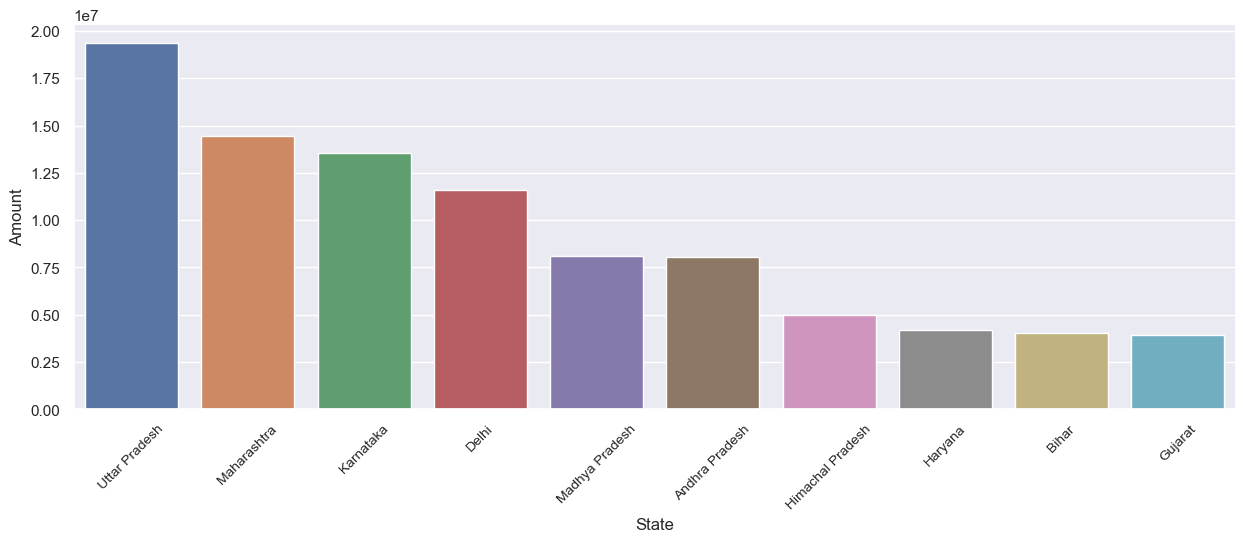

In [17]:
# total amount sales from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize = 10, rotation=45)
sns.barplot(data = sales_state, x='State', y='Amount')

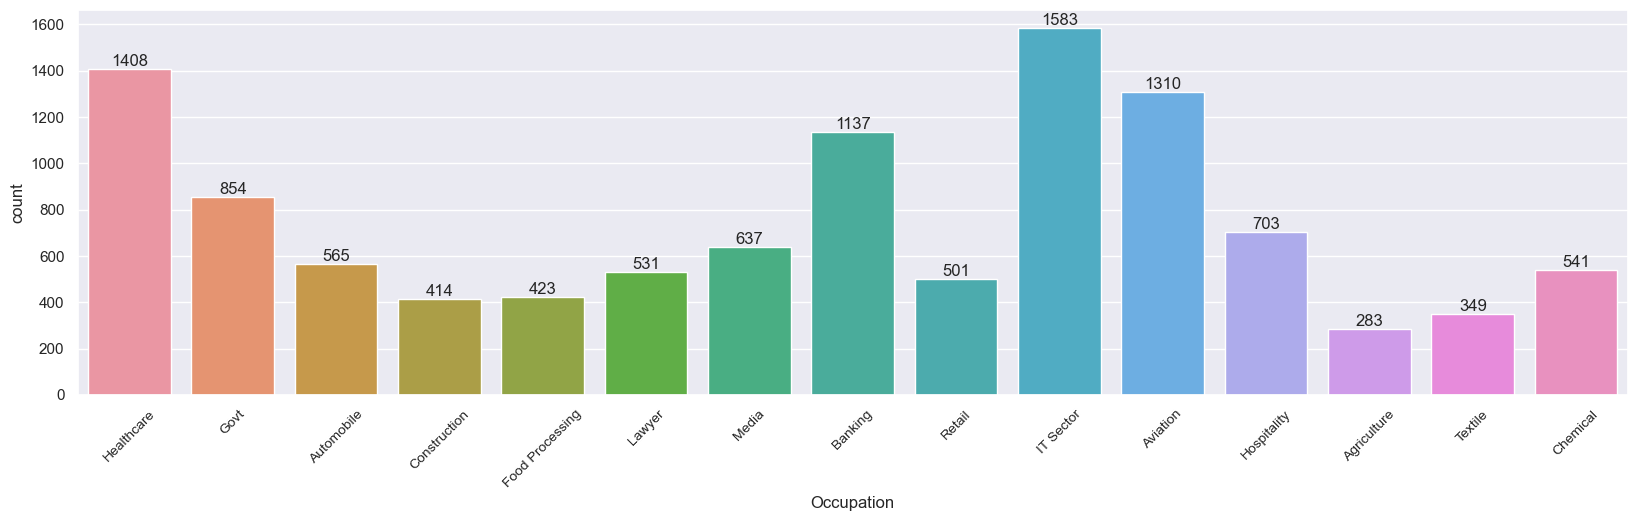

In [18]:
# EDA based on Occupation

sns.set(rc={'figure.figsize':(20,5)})
occ = sns.countplot(data = df, x ='Occupation')
plt.xticks(fontsize = 10, rotation=45)

for bars in occ.containers:
  occ.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

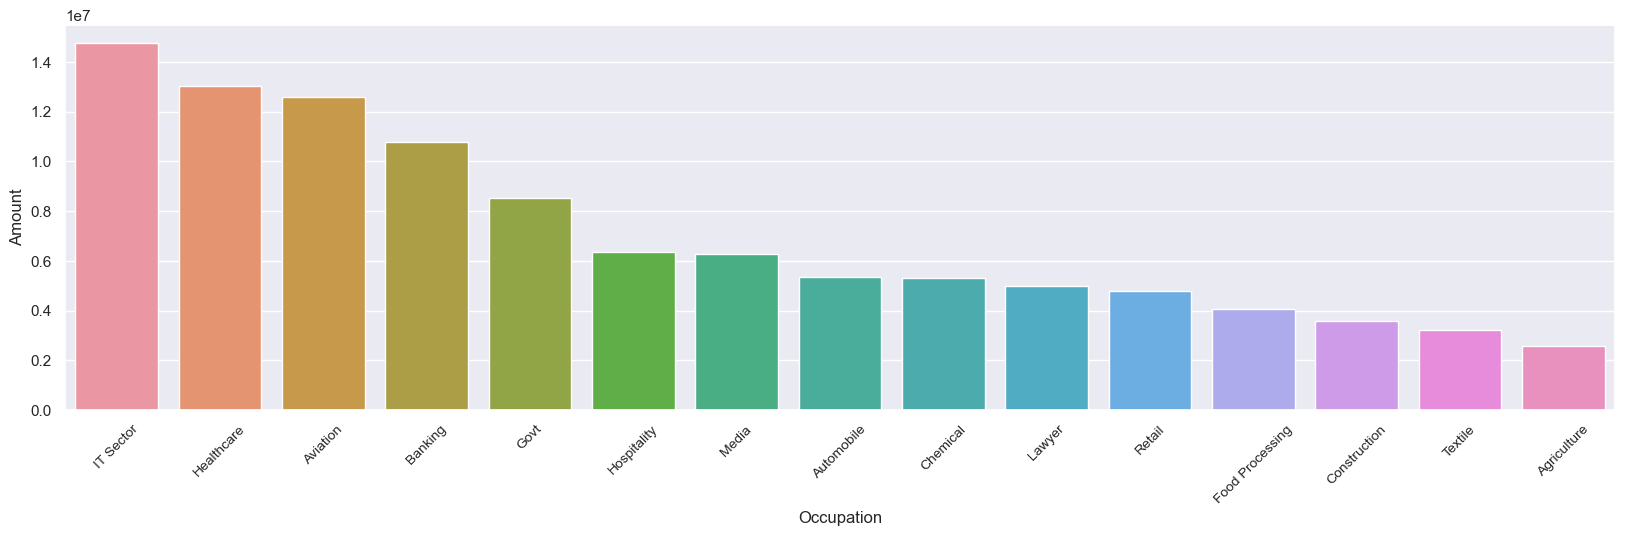

In [19]:
sales_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize = 10, rotation=45)
sns.barplot(data = sales_occupation, x = 'Occupation',y= 'Amount')

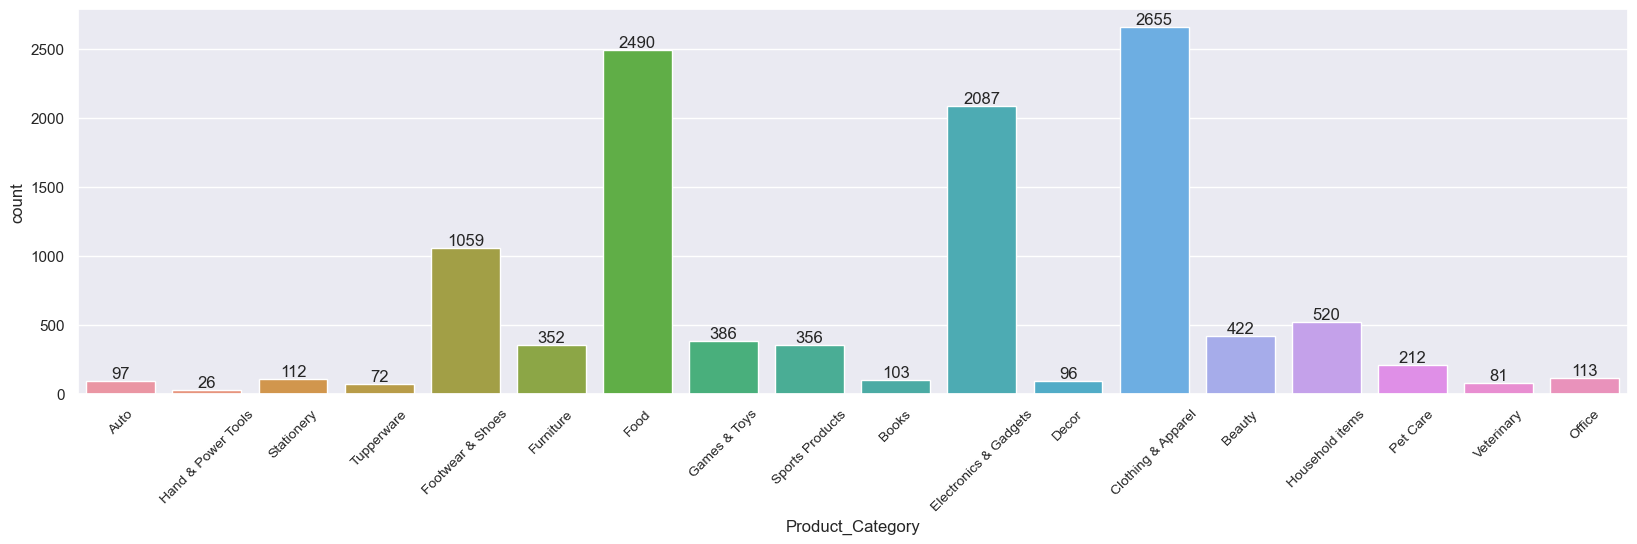

In [20]:
sns.set(rc={'figure.figsize':(20,5)})
product_cat = sns.countplot(data = df, x = 'Product_Category')
plt.xticks(fontsize = 10, rotation=45)

for bars in product_cat.containers:
   product_cat.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

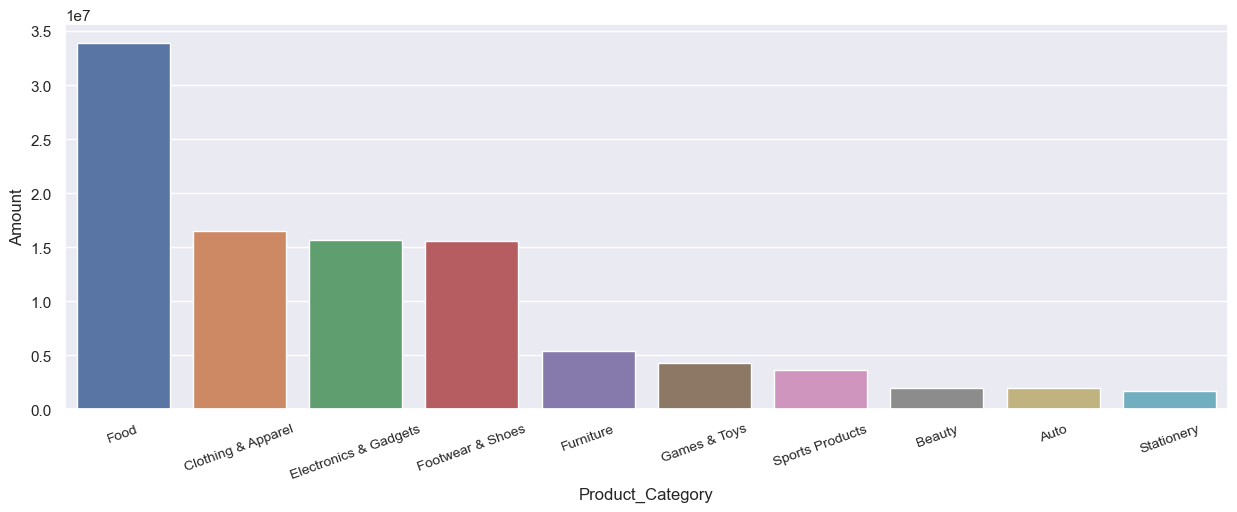

In [21]:
sales_product_category = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize = 10, rotation=20)
sns.barplot(data = sales_product_category, x = 'Product_Category',y= 'Amount')